## Projekat 1: Procena stepena gojaznosti - klasifikacija

>Class attribute: NObeyesdad

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer

### Load dataset

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
print(f"Number of NaN values in dataset:\n{data.isna().sum()}")

Number of NaN values in dataset:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


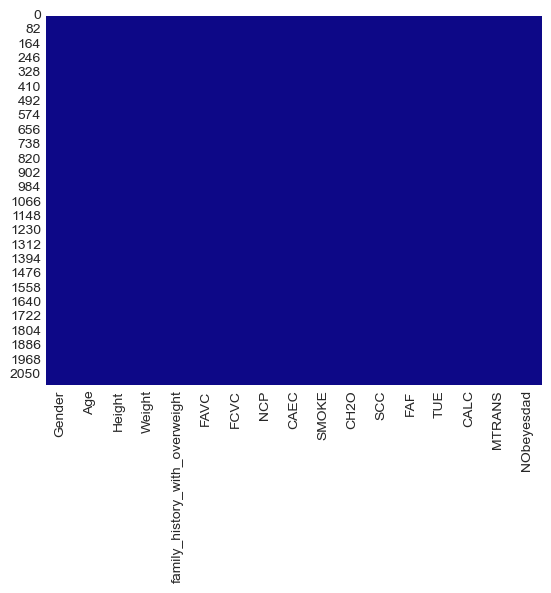

In [6]:
sns.heatmap(data.isna(), cbar=False, cmap='plasma')
plt.show()

In [7]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 24


In [9]:
data[data.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [6]:
data.drop_duplicates(inplace=True)
data = data.reset_index(drop=True)
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 0


### Explore features

In [13]:
numerical_features = ['Age', 'Height', 'Weight']
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
already_encoded_ordinal_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
ordinal_features_to_encode = ['CAEC', 'CALC']
nominal_features_to_encode = ["MTRANS"]
class_feature = "NObeyesdad"
class_names = ['Insufficient Weight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III']

In [8]:
data["Age"] = data["Age"].astype(int)

In [13]:
data[numerical_features].describe()

,Age,Height,Weight
count,2087.000000,2087.000000,2087.000000
mean,24.009104,1.702674,86.858730
std,6.333297,0.093186,26.190847
min,14.000000,1.450000,39.000000
25%,19.000000,1.630178,66.000000
50%,22.000000,1.701584,83.101100
75%,26.000000,1.769491,108.015907
max,61.000000,1.980000,173.000000


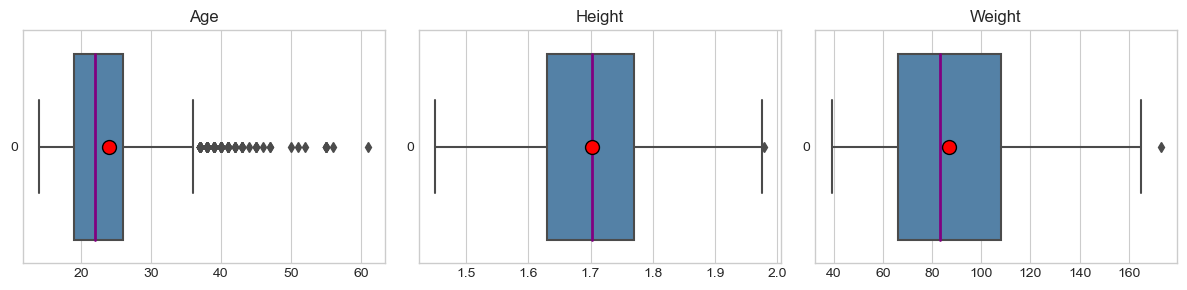

In [14]:
plt.figure(figsize=(12, 3))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    plt.title(feature)
    sns.boxplot(data[feature], orient='h', color="steelblue", showmeans=True,
                    medianprops={'linewidth': 2, 'color': 'purple'},
                    meanprops={"marker": "o",
                       'markerfacecolor':'red', 
                       'markeredgecolor':'black',
                       'markersize':'10'})

plt.tight_layout()

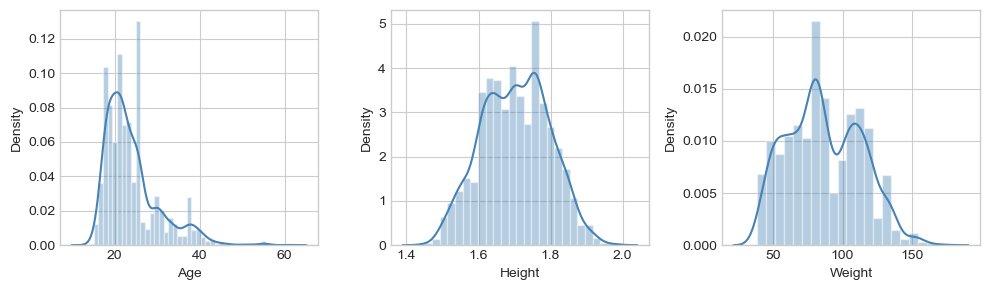

In [15]:
plt.figure(figsize=(10, 3))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.distplot(data[feature], color="steelblue")

plt.tight_layout()

In [16]:
data[numerical_features].skew()

Age       1.547297
Height   -0.024743
Weight    0.241902
dtype: float64

In [17]:
data[numerical_features].corr()

,Age,Height,Weight
Age,1.000000,-0.036012,0.186240
Height,-0.036012,1.000000,0.457468
Weight,0.186240,0.457468,1.000000


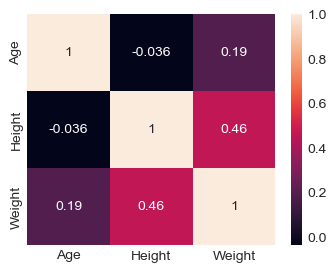

In [18]:
plt.figure(figsize=(4,3))

sns.heatmap(data[numerical_features].corr(), annot = True)

plt.show()

In [19]:
data.mode()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,21,1.7,80.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Obesity_Type_I


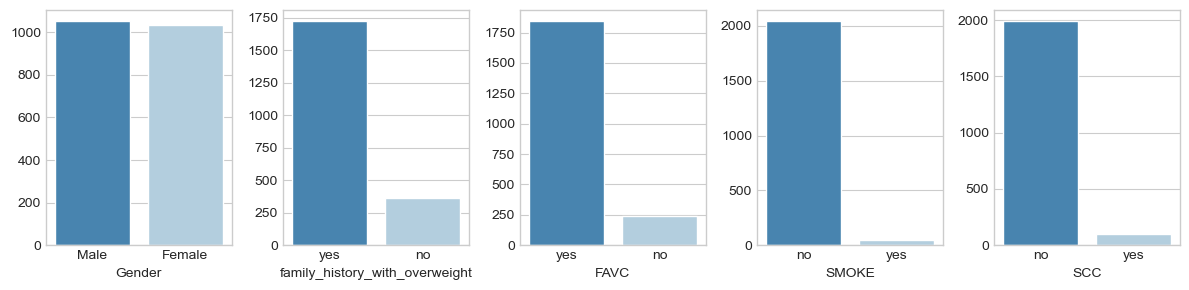

In [20]:
plt.figure(figsize=(12, 3))

for i, feature in enumerate(binary_features):
    plt.subplot(1, 5, i+1)
    counts = data[feature].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

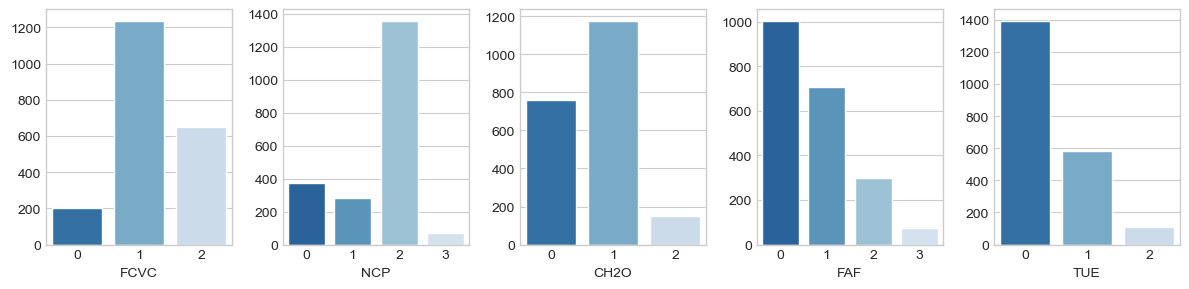

In [21]:
plt.figure(figsize=(12, 3))

for i, feature in enumerate(already_encoded_ordinal_features):
    data[feature] = data[feature].astype(int)
    min_val = min(data[feature])
    if min_val == 1: 
        data[feature] = data[feature] - 1

    plt.subplot(1, 5, i+1)
    counts = data[feature].value_counts()
    plt.xticks(counts.index)
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

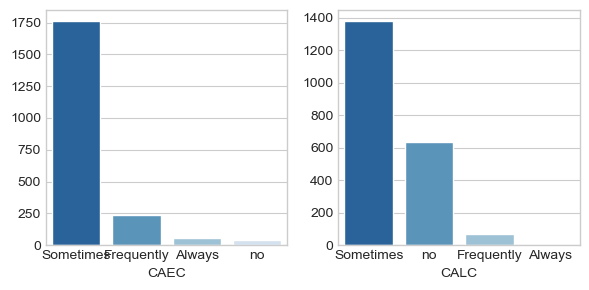

In [9]:
plt.figure(figsize=(6, 3))

for i, feature in enumerate(ordinal_features_to_encode):
    plt.subplot(1, 2, i+1)
    counts = data[feature].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

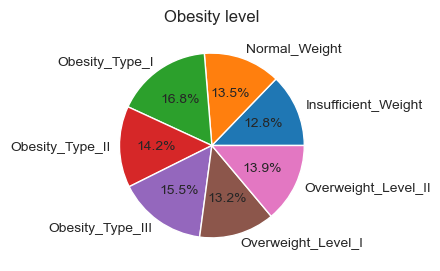

In [47]:
plt.figure(figsize=(6, 3))

plt.title("Obesity level")
data.groupby("NObeyesdad").size().plot(kind='pie', autopct='%1.1f%%')

plt.show()

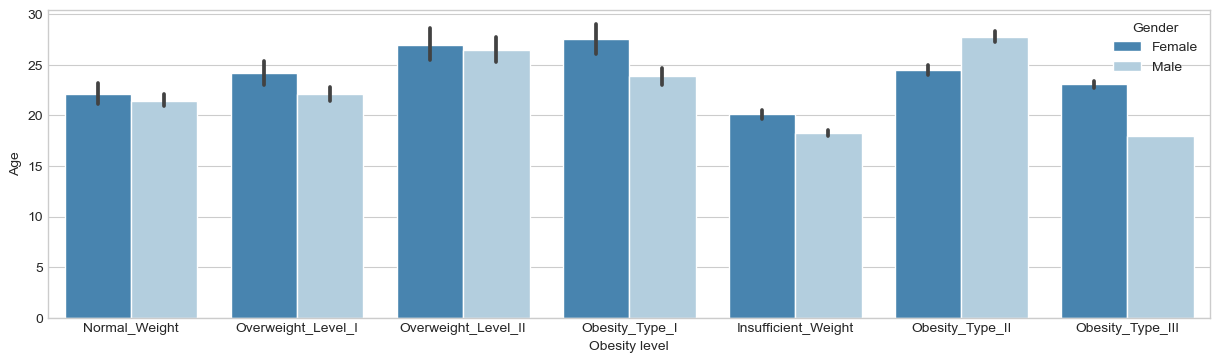

In [23]:
fig = plt.figure(figsize = (15, 4))

sns.barplot(x="NObeyesdad", y="Age", hue="Gender", data=data, palette="Blues_r")
plt.xlabel("Obesity level")
plt.ylabel("Age")

plt.show()

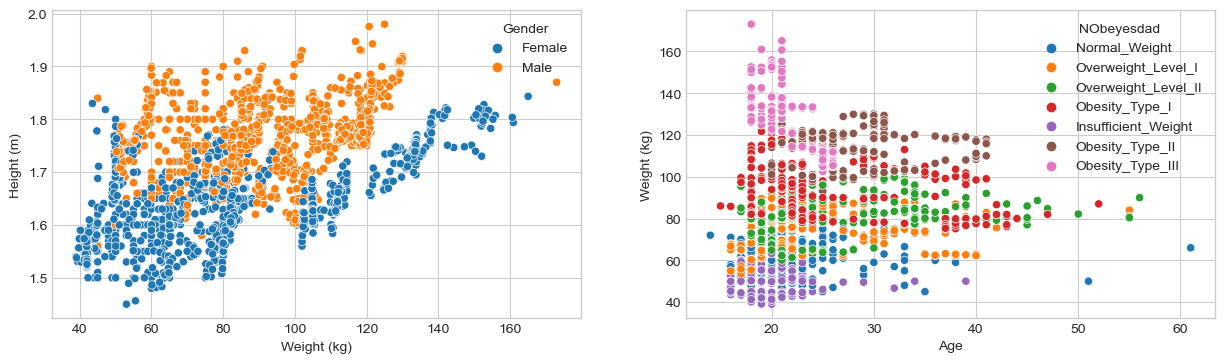

In [24]:
fig = plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Weight", y="Height", hue="Gender", data=data)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.subplot(1, 2, 2)
sns.scatterplot(x="Age", y="Weight", hue="NObeyesdad", data=data)
plt.xlabel("Age")
plt.ylabel("Weight (kg)")

plt.show()

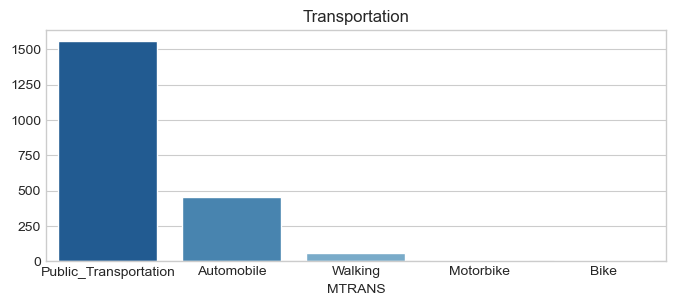

In [25]:
plt.figure(figsize=(8, 3))

plt.title("Transportation")
counts = data["MTRANS"].value_counts()
sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.show()

### Encode features

In [10]:
enc = OrdinalEncoder()
data[ordinal_features_to_encode] = enc.fit_transform(data[ordinal_features_to_encode])
data[ordinal_features_to_encode] = data[ordinal_features_to_encode].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   int32  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   int32  
 7   NCP                             2087 non-null   int32  
 8   CAEC                            2087 non-null   int32  
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   int32  
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [11]:
features_for_one_hot_encoding = binary_features + nominal_features_to_encode

ohe = OneHotEncoder(handle_unknown="ignore")

transformer = make_column_transformer((ohe, features_for_one_hot_encoding))
transformed = transformer.fit_transform(data[features_for_one_hot_encoding])
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.columns = [col.removeprefix("onehotencoder__") for col in transformed_df.columns]

data = pd.concat([data, transformed_df], axis=1)
data.drop(features_for_one_hot_encoding, axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2087 non-null   int32  
 1   Height                              2087 non-null   float64
 2   Weight                              2087 non-null   float64
 3   FCVC                                2087 non-null   float64
 4   NCP                                 2087 non-null   float64
 5   CAEC                                2087 non-null   int32  
 6   CH2O                                2087 non-null   float64
 7   FAF                                 2087 non-null   float64
 8   TUE                                 2087 non-null   float64
 9   CALC                                2087 non-null   int32  
 10  NObeyesdad                          2087 non-null   object 
 11  Gender_Female                       2087 no

[]

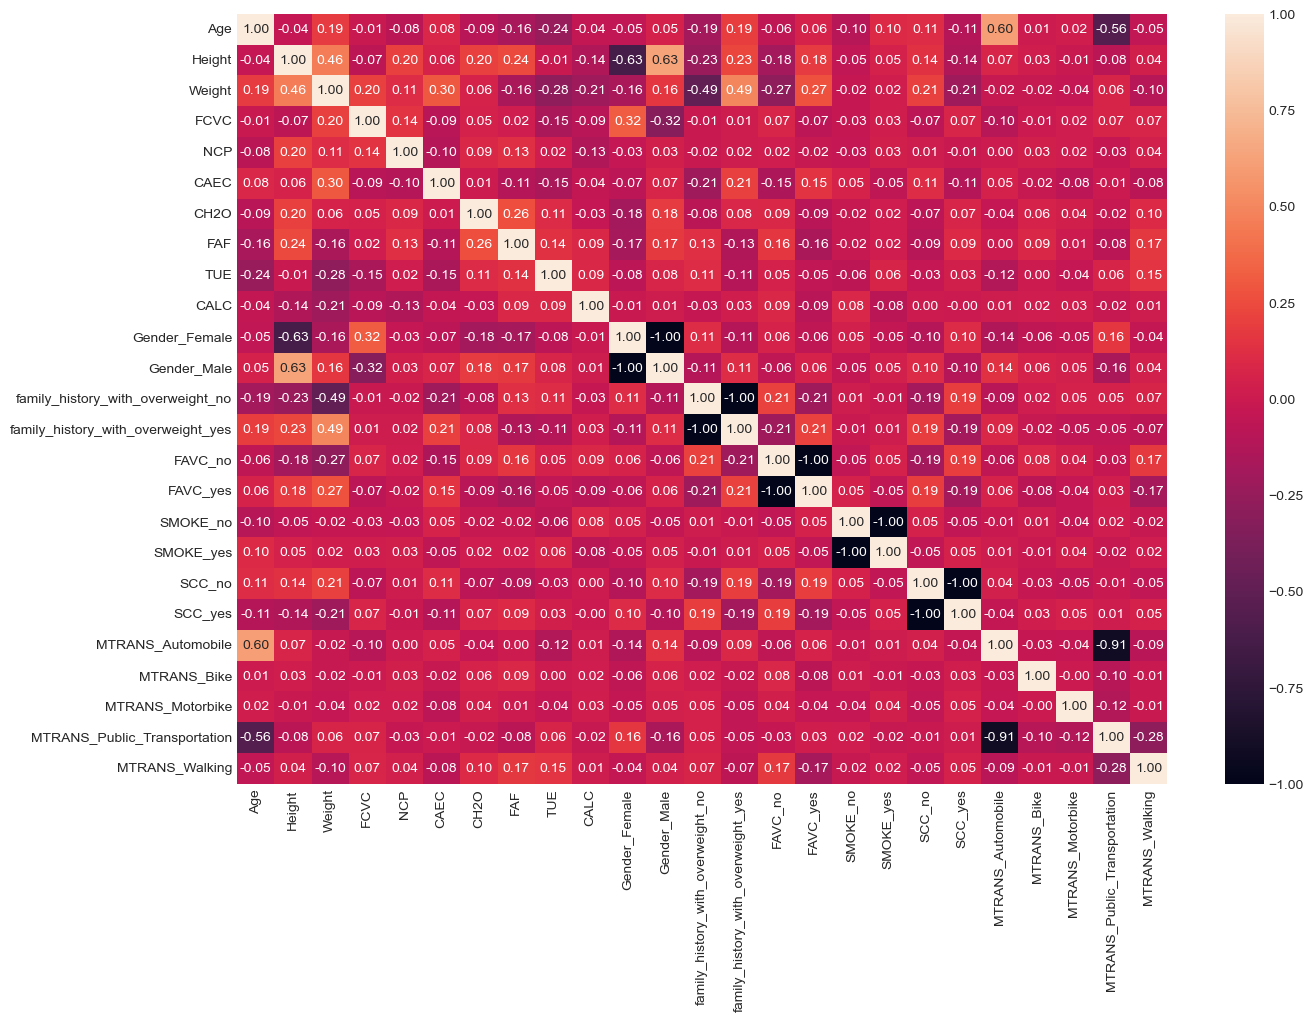

In [40]:
plt.figure(figsize=(15,10))

sns.heatmap(data.drop('NObeyesdad', axis = 1).corr(), annot = True, fmt='.2f')

plt.plot()

### Results

In [14]:
X = data.drop(class_feature, axis = 1)
y = data[class_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [15]:
scaler = MinMaxScaler()
X_train_minmax_scaled = scaler.fit_transform(X_train)
X_test_minmax_scaled = scaler.transform(X_test)

In [16]:
scaler = StandardScaler()
X_train_standard_scaled = scaler.fit_transform(X_train)
X_test_standard_scaled = scaler.transform(X_test)

In [207]:
def evaluate_dataset(y_pred, y_proba, y_test):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.grid(None)
    plt.show()

    area_under_roc = roc_auc_score(y_test, y_proba, multi_class="ovr", average=None)
    area_under_roc_macro = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
    area_under_roc_weithed = roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")

    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame.from_dict(report).transpose()
    accuracy_score = report_df.iloc[len(class_names)]["precision"]
    print('Accuracy score: {:.2f}'.format(accuracy_score))
    report_df.drop(report_df.index[len(class_names)], inplace=True)
    report_df.drop('support', axis=1, inplace=True)
    report_df["AU-ROC"] = np.concatenate((area_under_roc, [area_under_roc_macro, area_under_roc_weithed]))
    
    print(report_df.round(2))

##### K-Nearest Neighbors

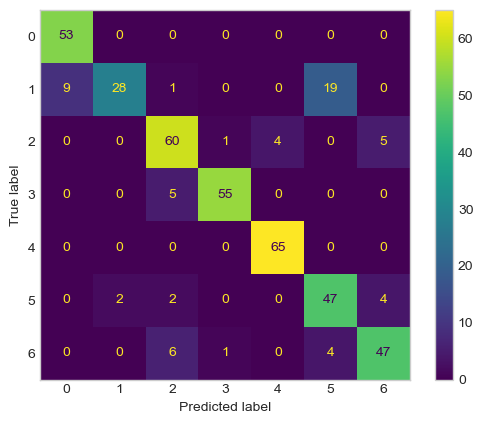

Accuracy score: 0.85
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.85    1.00      0.92    1.00
Normal_Weight             0.93    0.49      0.64    0.92
Obesity_Type_I            0.81    0.86      0.83    0.95
Obesity_Type_II           0.96    0.92      0.94    1.00
Obesity_Type_III          0.94    1.00      0.97    1.00
Overweight_Level_I        0.67    0.85      0.75    0.95
Overweight_Level_II       0.84    0.81      0.82    0.98
macro avg                 0.86    0.85      0.84    0.97
weighted avg              0.86    0.85      0.84    0.97


In [206]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)

evaluate_dataset(y_pred, y_proba, y_test)

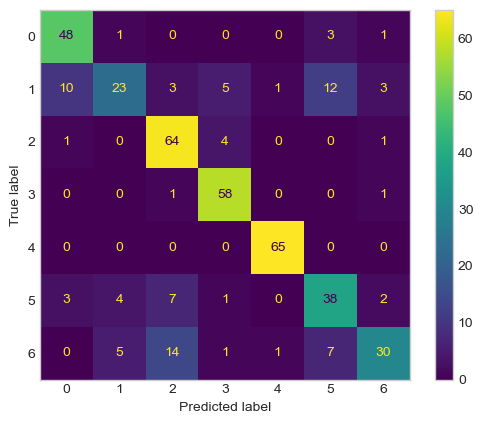

Accuracy score: 0.78
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.77    0.91      0.83    0.97
Normal_Weight             0.70    0.40      0.51    0.84
Obesity_Type_I            0.72    0.91      0.81    0.97
Obesity_Type_II           0.84    0.97      0.90    1.00
Obesity_Type_III          0.97    1.00      0.98    1.00
Overweight_Level_I        0.63    0.69      0.66    0.89
Overweight_Level_II       0.79    0.52      0.62    0.92
macro avg                 0.77    0.77      0.76    0.94
weighted avg              0.78    0.78      0.77    0.94


In [208]:
knn = KNeighborsClassifier()
knn.fit(X_train_minmax_scaled, y_train)
y_pred = knn.predict(X_test_minmax_scaled)
y_proba = knn.predict_proba(X_test_minmax_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

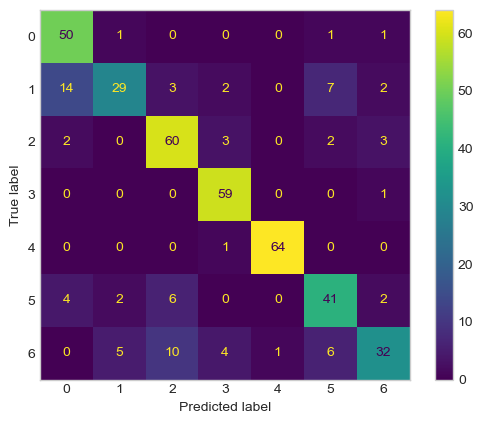

Accuracy score: 0.80
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.71    0.94      0.81    0.96
Normal_Weight             0.78    0.51      0.62    0.88
Obesity_Type_I            0.76    0.86      0.81    0.96
Obesity_Type_II           0.86    0.98      0.91    1.00
Obesity_Type_III          0.98    0.98      0.98    0.99
Overweight_Level_I        0.72    0.75      0.73    0.91
Overweight_Level_II       0.78    0.55      0.65    0.95
macro avg                 0.80    0.80      0.79    0.95
weighted avg              0.80    0.80      0.79    0.95


In [209]:
knn = KNeighborsClassifier()
knn.fit(X_train_standard_scaled, y_train)
y_pred = knn.predict(X_test_standard_scaled)
y_proba = knn.predict_proba(X_test_standard_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

##### Decision Tree

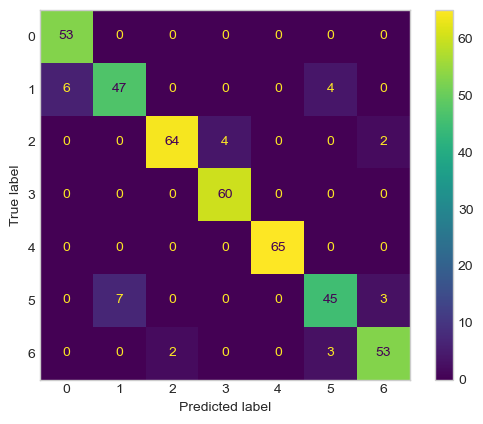

Accuracy score: 0.93
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.90    1.00      0.95    0.99
Normal_Weight             0.87    0.82      0.85    0.90
Obesity_Type_I            0.97    0.91      0.94    0.95
Obesity_Type_II           0.94    1.00      0.97    0.99
Obesity_Type_III          1.00    1.00      1.00    1.00
Overweight_Level_I        0.87    0.82      0.84    0.90
Overweight_Level_II       0.91    0.91      0.91    0.95
macro avg                 0.92    0.92      0.92    0.96
weighted avg              0.93    0.93      0.92    0.96


In [211]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
y_proba = dec_tree.predict_proba(X_test)

evaluate_dataset(y_pred, y_proba, y_test)

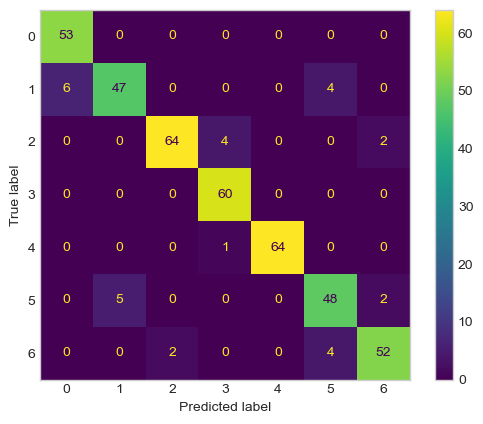

Accuracy score: 0.93
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.90    1.00      0.95    0.99
Normal_Weight             0.90    0.82      0.86    0.91
Obesity_Type_I            0.97    0.91      0.94    0.95
Obesity_Type_II           0.92    1.00      0.96    0.99
Obesity_Type_III          1.00    0.98      0.99    0.99
Overweight_Level_I        0.86    0.87      0.86    0.93
Overweight_Level_II       0.93    0.90      0.91    0.94
macro avg                 0.93    0.93      0.93    0.96
weighted avg              0.93    0.93      0.93    0.96


In [212]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_minmax_scaled, y_train)
y_pred = dec_tree.predict(X_test_minmax_scaled)
y_proba = dec_tree.predict_proba(X_test_minmax_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

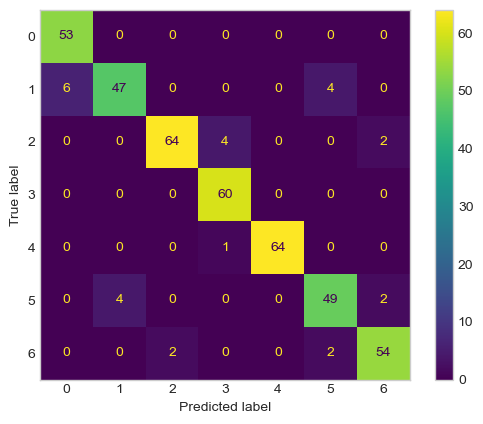

Accuracy score: 0.94
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.90    1.00      0.95    0.99
Normal_Weight             0.92    0.82      0.87    0.91
Obesity_Type_I            0.97    0.91      0.94    0.95
Obesity_Type_II           0.92    1.00      0.96    0.99
Obesity_Type_III          1.00    0.98      0.99    0.99
Overweight_Level_I        0.89    0.89      0.89    0.94
Overweight_Level_II       0.93    0.93      0.93    0.96
macro avg                 0.93    0.94      0.93    0.96
weighted avg              0.94    0.94      0.93    0.96


In [213]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_standard_scaled, y_train)
y_pred = dec_tree.predict(X_test_standard_scaled)
y_proba = dec_tree.predict_proba(X_test_standard_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

##### Naive-Bayes

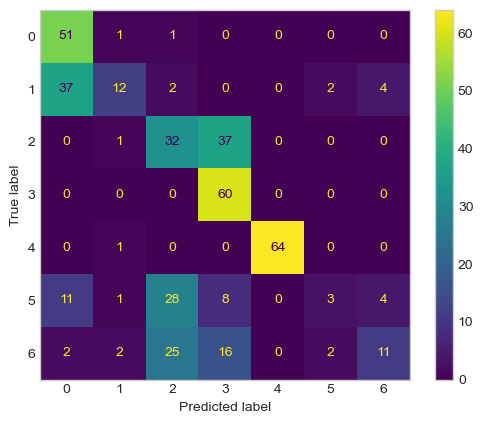

Accuracy score: 0.56
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.50    0.96      0.66    0.95
Normal_Weight             0.67    0.21      0.32    0.92
Obesity_Type_I            0.36    0.46      0.41    0.83
Obesity_Type_II           0.50    1.00      0.66    0.97
Obesity_Type_III          1.00    0.98      0.99    0.99
Overweight_Level_I        0.43    0.05      0.10    0.88
Overweight_Level_II       0.58    0.19      0.29    0.82
macro avg                 0.58    0.55      0.49    0.91
weighted avg              0.58    0.56      0.50    0.91


In [214]:
n_bayes = GaussianNB() 
n_bayes.fit(X_train, y_train)
y_pred = n_bayes.predict(X_test)
y_proba = n_bayes.predict_proba(X_test)

evaluate_dataset(y_pred, y_proba, y_test)

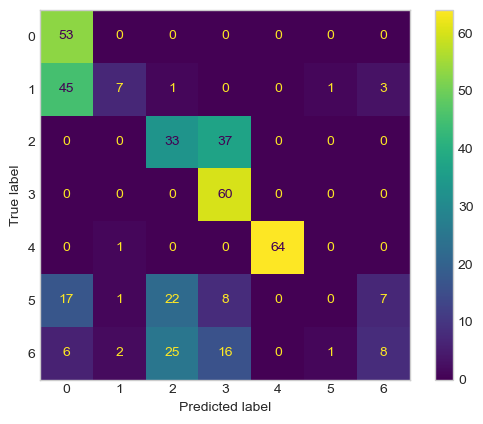

Accuracy score: 0.54
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.44    1.00      0.61    0.94
Normal_Weight             0.64    0.12      0.21    0.87
Obesity_Type_I            0.41    0.47      0.44    0.85
Obesity_Type_II           0.50    1.00      0.66    0.97
Obesity_Type_III          1.00    0.98      0.99    0.99
Overweight_Level_I        0.00    0.00      0.00    0.89
Overweight_Level_II       0.44    0.14      0.21    0.84
macro avg                 0.49    0.53      0.45    0.91
weighted avg              0.50    0.54      0.46    0.91


In [215]:
n_bayes = GaussianNB() 
n_bayes.fit(X_train_minmax_scaled, y_train)
y_pred = n_bayes.predict(X_test_minmax_scaled)
y_proba = n_bayes.predict_proba(X_test_minmax_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

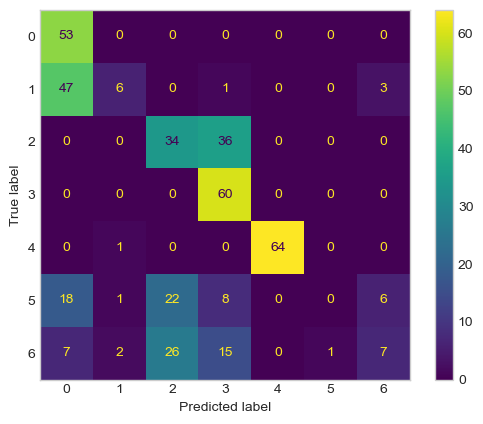

Accuracy score: 0.54
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.42    1.00      0.60    0.94
Normal_Weight             0.60    0.11      0.18    0.84
Obesity_Type_I            0.41    0.49      0.45    0.86
Obesity_Type_II           0.50    1.00      0.67    0.97
Obesity_Type_III          1.00    0.98      0.99    0.99
Overweight_Level_I        0.00    0.00      0.00    0.88
Overweight_Level_II       0.44    0.12      0.19    0.84
macro avg                 0.48    0.53      0.44    0.90
weighted avg              0.49    0.54      0.45    0.90


In [216]:
n_bayes = GaussianNB() 
n_bayes.fit(X_train_standard_scaled, y_train)
y_pred = n_bayes.predict(X_test_standard_scaled)
y_proba = n_bayes.predict_proba(X_test_standard_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

##### Random Forest

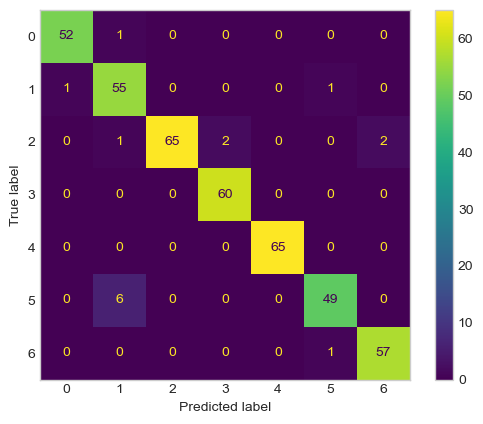

Accuracy score: 0.96
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.98    0.98      0.98    1.00
Normal_Weight             0.87    0.96      0.92    0.99
Obesity_Type_I            1.00    0.93      0.96    1.00
Obesity_Type_II           0.97    1.00      0.98    1.00
Obesity_Type_III          1.00    1.00      1.00    1.00
Overweight_Level_I        0.96    0.89      0.92    0.99
Overweight_Level_II       0.97    0.98      0.97    1.00
macro avg                 0.96    0.96      0.96    1.00
weighted avg              0.97    0.96      0.96    1.00


In [217]:
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train, y_train)
y_pred = rnd_forest.predict(X_test)
y_proba = rnd_forest.predict_proba(X_test)

evaluate_dataset(y_pred, y_proba, y_test)

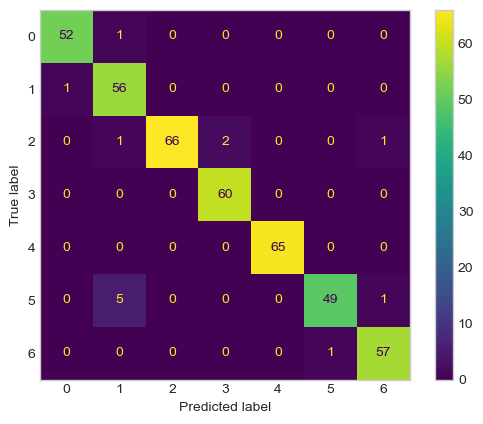

Accuracy score: 0.97
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.98    0.98      0.98    1.00
Normal_Weight             0.89    0.98      0.93    1.00
Obesity_Type_I            1.00    0.94      0.97    1.00
Obesity_Type_II           0.97    1.00      0.98    1.00
Obesity_Type_III          1.00    1.00      1.00    1.00
Overweight_Level_I        0.98    0.89      0.93    0.99
Overweight_Level_II       0.97    0.98      0.97    1.00
macro avg                 0.97    0.97      0.97    1.00
weighted avg              0.97    0.97      0.97    1.00


In [218]:
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train_minmax_scaled, y_train)
y_pred = rnd_forest.predict(X_test_minmax_scaled)
y_proba = rnd_forest.predict_proba(X_test_minmax_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

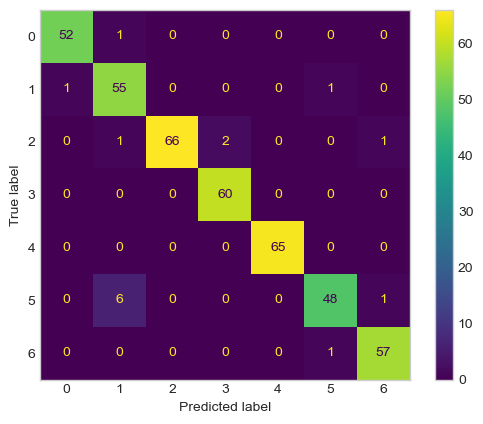

Accuracy score: 0.96
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.98    0.98      0.98    1.00
Normal_Weight             0.87    0.96      0.92    0.99
Obesity_Type_I            1.00    0.94      0.97    1.00
Obesity_Type_II           0.97    1.00      0.98    1.00
Obesity_Type_III          1.00    1.00      1.00    1.00
Overweight_Level_I        0.96    0.87      0.91    0.99
Overweight_Level_II       0.97    0.98      0.97    1.00
macro avg                 0.96    0.96      0.96    1.00
weighted avg              0.97    0.96      0.96    1.00


In [219]:
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train_standard_scaled, y_train)
y_pred = rnd_forest.predict(X_test_standard_scaled)
y_proba = rnd_forest.predict_proba(X_test_standard_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

##### Gradient Boosting

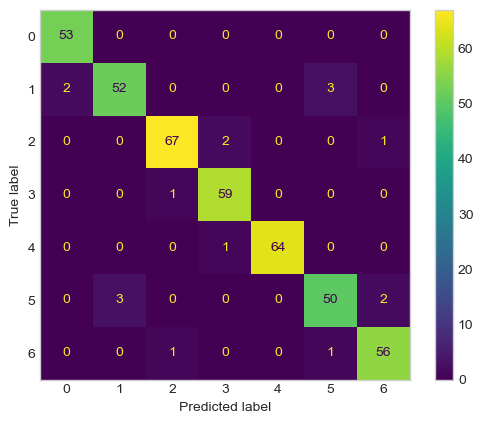

Accuracy score: 0.96
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.96    1.00      0.98     1.0
Normal_Weight             0.95    0.91      0.93     1.0
Obesity_Type_I            0.97    0.96      0.96     1.0
Obesity_Type_II           0.95    0.98      0.97     1.0
Obesity_Type_III          1.00    0.98      0.99     1.0
Overweight_Level_I        0.93    0.91      0.92     1.0
Overweight_Level_II       0.95    0.97      0.96     1.0
macro avg                 0.96    0.96      0.96     1.0
weighted avg              0.96    0.96      0.96     1.0


In [220]:
gr_boosting = GradientBoostingClassifier() 
gr_boosting.fit(X_train, y_train)
y_pred = gr_boosting.predict(X_test)
y_proba = gr_boosting.predict_proba(X_test)

evaluate_dataset(y_pred, y_proba, y_test)

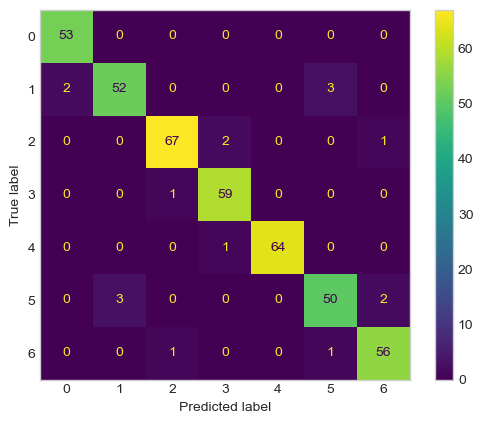

Accuracy score: 0.96
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.96    1.00      0.98     1.0
Normal_Weight             0.95    0.91      0.93     1.0
Obesity_Type_I            0.97    0.96      0.96     1.0
Obesity_Type_II           0.95    0.98      0.97     1.0
Obesity_Type_III          1.00    0.98      0.99     1.0
Overweight_Level_I        0.93    0.91      0.92     1.0
Overweight_Level_II       0.95    0.97      0.96     1.0
macro avg                 0.96    0.96      0.96     1.0
weighted avg              0.96    0.96      0.96     1.0


In [221]:
gr_boosting = GradientBoostingClassifier() 
gr_boosting.fit(X_train_minmax_scaled, y_train)
y_pred = gr_boosting.predict(X_test_minmax_scaled)
y_proba = gr_boosting.predict_proba(X_test_minmax_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

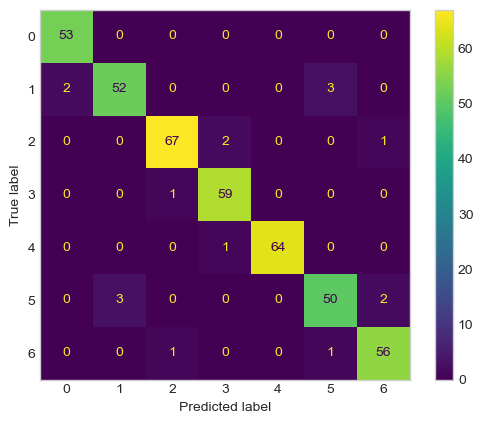

Accuracy score: 0.96
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.96    1.00      0.98     1.0
Normal_Weight             0.95    0.91      0.93     1.0
Obesity_Type_I            0.97    0.96      0.96     1.0
Obesity_Type_II           0.95    0.98      0.97     1.0
Obesity_Type_III          1.00    0.98      0.99     1.0
Overweight_Level_I        0.93    0.91      0.92     1.0
Overweight_Level_II       0.95    0.97      0.96     1.0
macro avg                 0.96    0.96      0.96     1.0
weighted avg              0.96    0.96      0.96     1.0


In [222]:
gr_boosting = GradientBoostingClassifier() 
gr_boosting.fit(X_train_standard_scaled, y_train)
y_pred = gr_boosting.predict(X_test_standard_scaled)
y_proba = gr_boosting.predict_proba(X_test_standard_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

##### SVM

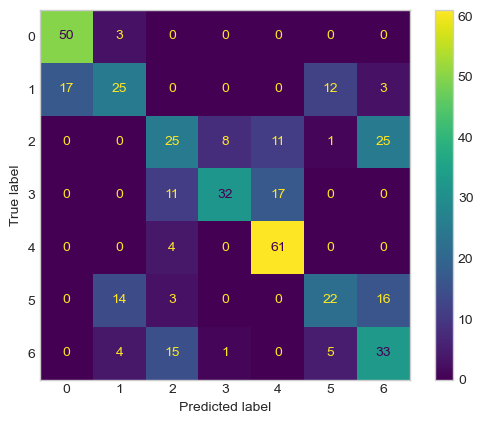

Accuracy score: 0.59
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.75    0.94      0.83    0.99
Normal_Weight             0.54    0.44      0.49    0.92
Obesity_Type_I            0.43    0.36      0.39    0.82
Obesity_Type_II           0.78    0.53      0.63    0.95
Obesity_Type_III          0.69    0.94      0.79    0.96
Overweight_Level_I        0.55    0.40      0.46    0.88
Overweight_Level_II       0.43    0.57      0.49    0.87
macro avg                 0.60    0.60      0.58    0.91
weighted avg              0.59    0.59      0.58    0.91


In [223]:
svm = SVC(probability=True) 
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)

evaluate_dataset(y_pred, y_proba, y_test)

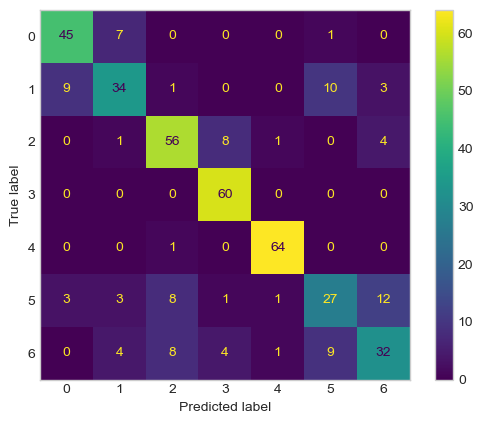

Accuracy score: 0.76
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.79    0.85      0.82    0.99
Normal_Weight             0.69    0.60      0.64    0.95
Obesity_Type_I            0.76    0.80      0.78    0.98
Obesity_Type_II           0.82    1.00      0.90    1.00
Obesity_Type_III          0.96    0.98      0.97    1.00
Overweight_Level_I        0.57    0.49      0.53    0.92
Overweight_Level_II       0.63    0.55      0.59    0.94
macro avg                 0.75    0.75      0.75    0.97
weighted avg              0.75    0.76      0.75    0.97


In [224]:
svm = SVC(probability=True) 
svm.fit(X_train_minmax_scaled, y_train)
y_pred = svm.predict(X_test_minmax_scaled)
y_proba = svm.predict_proba(X_test_minmax_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

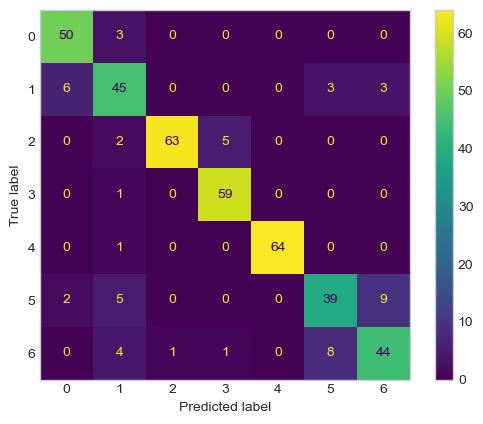

Accuracy score: 0.87
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.86    0.94      0.90    0.99
Normal_Weight             0.74    0.79      0.76    0.97
Obesity_Type_I            0.98    0.90      0.94    1.00
Obesity_Type_II           0.91    0.98      0.94    1.00
Obesity_Type_III          1.00    0.98      0.99    1.00
Overweight_Level_I        0.78    0.71      0.74    0.97
Overweight_Level_II       0.79    0.76      0.77    0.98
macro avg                 0.87    0.87      0.86    0.99
weighted avg              0.87    0.87      0.87    0.99


In [225]:
svm = SVC(probability=True) 
svm.fit(X_train_standard_scaled, y_train)
y_pred = svm.predict(X_test_standard_scaled)
y_proba = svm.predict_proba(X_test_standard_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

##### Logistic Regression

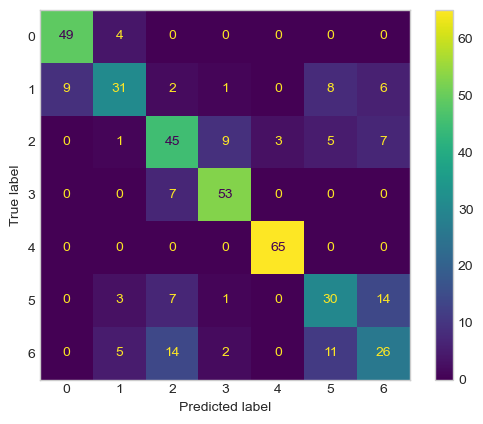

Accuracy score: 0.72
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.84    0.92      0.88    0.99
Normal_Weight             0.70    0.54      0.61    0.93
Obesity_Type_I            0.60    0.64      0.62    0.89
Obesity_Type_II           0.80    0.88      0.84    0.98
Obesity_Type_III          0.96    1.00      0.98    1.00
Overweight_Level_I        0.56    0.55      0.55    0.90
Overweight_Level_II       0.49    0.45      0.47    0.87
macro avg                 0.71    0.71      0.71    0.94
weighted avg              0.71    0.72      0.71    0.94


In [226]:
log_regression = LogisticRegression() 
log_regression.fit(X_train, y_train)
y_pred = log_regression.predict(X_test)
y_proba = log_regression.predict_proba(X_test)

evaluate_dataset(y_pred, y_proba, y_test)

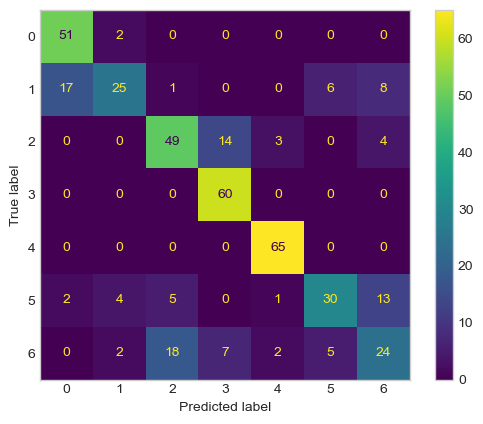

Accuracy score: 0.73
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.73    0.96      0.83    0.99
Normal_Weight             0.76    0.44      0.56    0.91
Obesity_Type_I            0.67    0.70      0.69    0.92
Obesity_Type_II           0.74    1.00      0.85    0.99
Obesity_Type_III          0.92    1.00      0.96    1.00
Overweight_Level_I        0.73    0.55      0.62    0.92
Overweight_Level_II       0.49    0.41      0.45    0.89
macro avg                 0.72    0.72      0.71    0.95
weighted avg              0.72    0.73      0.71    0.95


In [227]:
log_regression = LogisticRegression() 
log_regression.fit(X_train_minmax_scaled, y_train)
y_pred = log_regression.predict(X_test_minmax_scaled)
y_proba = log_regression.predict_proba(X_test_minmax_scaled)

evaluate_dataset(y_pred, y_proba, y_test)

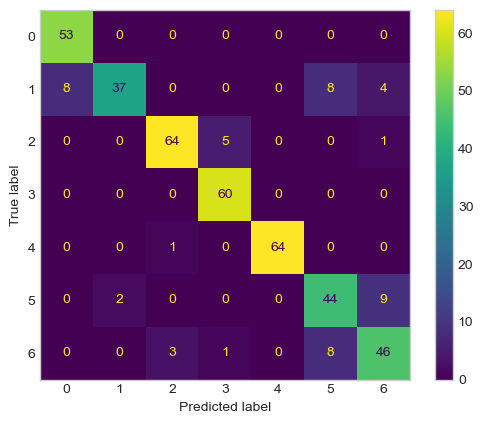

Accuracy score: 0.88
                     precision  recall  f1-score  AU-ROC
Insufficient_Weight       0.87    1.00      0.93    1.00
Normal_Weight             0.95    0.65      0.77    0.98
Obesity_Type_I            0.94    0.91      0.93    1.00
Obesity_Type_II           0.91    1.00      0.95    1.00
Obesity_Type_III          1.00    0.98      0.99    1.00
Overweight_Level_I        0.73    0.80      0.77    0.97
Overweight_Level_II       0.77    0.79      0.78    0.96
macro avg                 0.88    0.88      0.87    0.99
weighted avg              0.89    0.88      0.88    0.99


In [228]:
log_regression = LogisticRegression() 
log_regression.fit(X_train_standard_scaled, y_train)
y_pred = log_regression.predict(X_test_standard_scaled)
y_proba = log_regression.predict_proba(X_test_standard_scaled)

evaluate_dataset(y_pred, y_proba, y_test)